# Create Fractals and Fractal Trees in Python using L-systems

- https://www.youtube.com/watch?v=ob8teyuR8dA

## Simple turtle graphics with matplotlib

In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

class MplTurtle():
    def __init__(self):
        """Build a array using turtle graphics movement.
        Starts at (0, 0) with a direction of 0 (pointing up).
        """
        self.__direction = 0
        self.__x = 0
        self.__y = 0
        self.__x_stack = [self.__x]
        self.__y_stack = [self.__y]

    def forward(self, distance):
        """Move in the current direction and draw a line with Euclidian
        distance.
        """
        new_x = self.__x + distance * math.cos(self.__direction)
        new_y = self.__y + distance * math.sin(self.__direction)

        self.__x_stack.append(int(new_x))
        self.__y_stack.append(int(new_y))

        self.__x = new_x
        self.__y = new_y

    def rotate(self, angle):
        """Rotate the turtle by a given angle in degrees.
        Positive rotates left/counterclockwise, negative right/clockwise.
        Convert angle to radians to work with cos and sin
        """
        angle_rad = math.radians(angle)
        self.__direction += angle_rad % math.tau

    @property
    def direction(self):
        """Get the current direction in degrees."""
        return math.degrees(self.__direction)

    @property
    def position(self):
        """Current x and y position."""
        return self.__x, self.__y

    def draw(self, *args, **kwargs):
        """Draw a matplolib figure"""
        plt.figure(*args, **kwargs)
        plt.plot(self.__x_stack, self.__y_stack, marker=None, color="black")

        m = mpl.markers.MarkerStyle(marker=">")
        m._transform = m.get_transform().rotate_deg(self.direction)
        plt.plot(self.__x, self.__y, marker=m, color="red")
        
        plt.axis('off')
        plt.show()

## What is a L-system
From [wikipedia](https://en.wikipedia.org/wiki/L-system):
> *An L-system or Lindenmayer system is a parallel rewriting system and a type of formal grammar. An L-system consists of an alphabet of symbols that can be used to make strings, a collection of production rules that expand each symbol into some larger string of symbols, an initial "axiom" string from which to begin construction, and a mechanism for translating the generated strings into geometric structures.*

> *The recursive nature of the L-system rules leads to self-similarity and thereby, fractal-like forms are easy to describe with an L-system.*

- **axiom** is a string of symbols defining the initial state of the system
- **rules** are a set of production rules or productions defining the way variables can be replaced with combinations of constants and other variables

### Example of a L-system
Lindenmayer's original L-system for modelling the growth of algae
- variables: A, B- constants: none- 
axim   A- 
rul  : (A → AB), (B → A)

In [2]:
generations = 10
axiom = "A"
rules = {
    "A": "AB",  # (A → AB)
    "B": "A",  # (B → A)
}

def apply_rules(axiom, rules):
    return "".join([rules.get(chr, chr) for chr in axiom])

for gen in range(generations):
    print(f"generation {gen}: {axiom}")
    axiom = apply_rules(axiom, rules)

generation 0: A
generation 1: AB
generation 2: ABA
generation 3: ABAAB
generation 4: ABAABABA
generation 5: ABAABABAABAAB
generation 6: ABAABABAABAABABAABABA
generation 7: ABAABABAABAABABAABABAABAABABAABAAB
generation 8: ABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABABA
generation 9: ABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABAAB


In [3]:
def grow_system(axiom, rules, generations):
    result = axiom
    for _ in range(generations):
        result = apply_rules(result, rules)
    return result

system1 = grow_system("A", {"A": "AB", "B": "A"}, 20)

print(len(system1))

17711


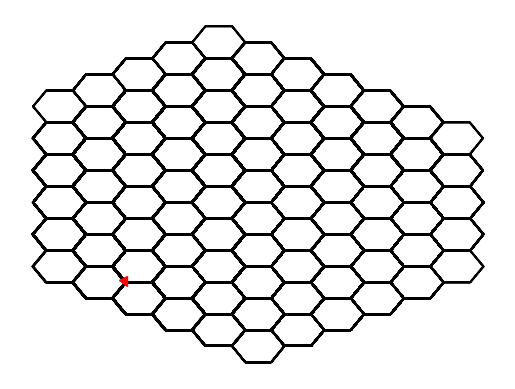

In [4]:
fractal1 = MplTurtle()

for char in system1:
    if char == "A":
        fractal1.rotate(60)
        fractal1.forward(50)
    else:
        fractal1.rotate(-60)
        fractal1.forward(50)
    
fractal1.draw()

## L-System for Sierpinski triangle
- variables: F, G
- constants: +, -
- axiom: F
- rules: (F → F-G+F+G-F), (G → GG)
- angle: 120

Interpreting characters as commands:
- F, G: draw segment
- +: turn right by angle
- -: turn left by angle

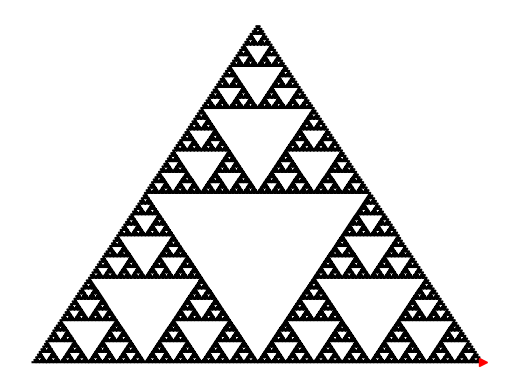

In [5]:
system2 = grow_system(
    "F",
    {"F": "F-G+F+G-F", "G": "GG"},
    7
)

fractal2 = MplTurtle()
for char in system2:
    if char in ["F", "G"]:
        fractal2.forward(8)
    elif char == "+":
        fractal2.rotate(-120)
    elif char == "-":
        fractal2.rotate(120)
    
fractal2.draw()